<a href="https://colab.research.google.com/github/celestecastro15/Seminario_MachineLearning/blob/main/RED_NEURONAL_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Neuronal para clasificación de dígitos.

In [ ]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch import nn, optim
import numpy as np
import matplotlib.pyplot as plt
import os 

In [ ]:
path = os.getcwd()

In [ ]:
#Descargamos el conjunto de datos
trainset = datasets.MNIST(path,download=True, train=True, transform=transforms.ToTensor())
valset = datasets.MNIST(path,download=True, train=False, transform=transforms.ToTensor())

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=10000, shuffle=False)

In [ ]:
trainloader

In [ ]:
trainloader[0]

TypeError: 'DataLoader' object is not subscriptable

In [ ]:
a = next(iter(trainloader))

In [ ]:
len(a)

2

In [ ]:
a[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
a[1]

tensor([6, 4, 9, 1, 5, 2, 4, 0, 1, 4, 6, 2, 9, 5, 0, 0, 1, 1, 6, 1, 2, 3, 0, 3,
        8, 6, 4, 4, 0, 6, 2, 0, 9, 2, 7, 9, 4, 3, 2, 9, 0, 1, 1, 7, 2, 4, 2, 2,
        5, 3, 0, 4, 2, 0, 2, 9, 3, 4, 1, 9, 7, 1, 8, 9])

In [ ]:
a[0][0].shape

torch.Size([1, 28, 28])

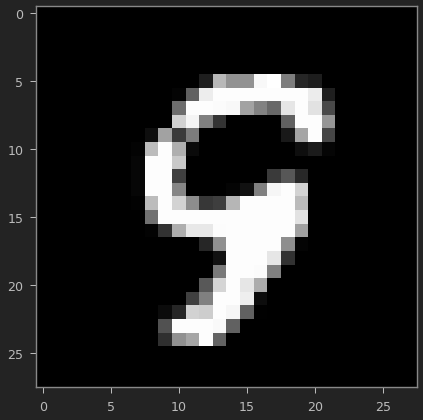

In [ ]:
plt.imshow(a[0][2].reshape(28,28), cmap ="gray")

In [ ]:
images_batch1 = [i for i,_ in trainloader]

In [ ]:
len(images_batch1)

938

In [ ]:
938*64

60032

In [ ]:
images_batch1[0].shape

torch.Size([64, 1, 28, 28])

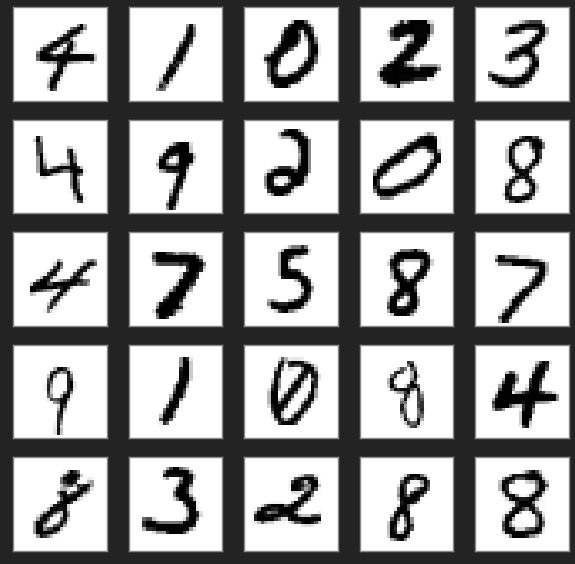

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_batch1[1][i].reshape(28,28), cmap=plt.cm.binary)
    #plt.xlabel(class_names[labels_batch1[i]])
plt.show()

In [ ]:
class NN_digits(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)
        
    def forward(self, X):
        l1 = torch.sigmoid(self.fc1(X))
        l2 = torch.sigmoid(self.fc2(l1))
        l3 = self.fc3(l2)
        return l3 

In [ ]:
iteraciones = 7

In [ ]:
model = NN_digits()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
loss = torch.nn.CrossEntropyLoss()

In [ ]:
for i in range(iteraciones):
    for image, label in trainloader:
        image = image.reshape(-1,28*28)
        
        optimizer.zero_grad()
        y = model(image)
        
        loss_1 = loss(y, label)
        loss_1.backward()
        
        optimizer.step()
        
    print("iteración", i+1, ", error:", loss_1.item())

iteración 1 , error: 1.2433890104293823
iteración 2 , error: 0.4576733112335205
iteración 3 , error: 0.37763872742652893
iteración 4 , error: 0.46224936842918396
iteración 5 , error: 0.30453312397003174
iteración 6 , error: 0.41900572180747986
iteración 7 , error: 0.09879234433174133


In [ ]:
model(a[0][0].reshape(28*28))

tensor([ 0.8289, -4.1427,  2.2419, -2.4930,  3.3009,  2.7735,  8.9459, -7.8423,
        -0.1732, -3.6948], grad_fn=<AddBackward0>)

In [ ]:
soft = nn.Softmax(dim = 1)

In [ ]:
soft(model(a[0].reshape(64,28*28)))

tensor([[2.9628e-04, 2.0539e-06, 1.2173e-03, 1.0691e-05, 3.5099e-03, 2.0713e-03,
         9.9278e-01, 5.0796e-08, 1.0877e-04, 3.2142e-06],
        [8.2463e-05, 9.6991e-08, 6.9472e-05, 1.2451e-06, 9.8408e-01, 3.3706e-04,
         1.1583e-03, 1.1446e-04, 1.6056e-04, 1.3996e-02],
        [1.9784e-03, 4.2014e-05, 4.1155e-03, 6.4872e-03, 4.7008e-01, 9.0184e-02,
         3.2380e-03, 5.2811e-04, 1.8127e-01, 2.4208e-01],
        [9.0798e-09, 9.8834e-01, 2.9727e-03, 8.7898e-04, 3.5042e-05, 4.0825e-04,
         3.9947e-04, 3.0002e-05, 6.8946e-03, 4.4073e-05],
        [2.0828e-04, 1.9851e-04, 4.8769e-05, 1.0334e-01, 3.1833e-03, 3.1681e-01,
         3.6825e-06, 2.4285e-02, 2.9918e-02, 5.2201e-01],
        [2.9404e-04, 8.8676e-04, 9.1042e-01, 3.0079e-03, 4.9436e-05, 2.8158e-03,
         2.4288e-02, 5.8356e-07, 5.8234e-02, 6.1550e-06],
        [3.8028e-05, 6.3038e-07, 7.0371e-04, 5.4803e-07, 9.7889e-01, 7.4405e-05,
         1.7039e-02, 1.6759e-04, 3.8701e-05, 3.0490e-03],
        [9.8531e-01, 6.9152

In [ ]:
model.eval()
for im, lb in valloader:
    im = im.reshape(-1,28*28)
    y = model(im)
    y_probs = soft(y)
    y_pred = torch.argmax(y_probs, dim = 1)
    prec = (lb == y_pred).sum().item()/10000

In [ ]:
prec*100

92.05